In [1]:
! pip install pandas numpy

/Users/mohamedmentis/.zshenv:.:1: no such file or directory: /Users/mohamedmentis/.cargo/env
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/52/11/9eac327a38834f162b8250aab32a6781339c69afe7574368fffe46387edf/pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/47/7c/864cb966b96fce5e63fcf25e1e4d957fe5725a635e5f11fe03f39dd9d6b5/numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/11/c3/005fcca25ce078d2cc29fd559379817424e94885510568bc1bc53d7d5846/pytz-2024.2-py2.py3-none-any.whl.metadata
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("../data/dairy_cows.csv")
df.head()

,ID,Species,Animal_Class,WQ_Principles,WQ_Criteria,Welfare_Hazards_Animal,Welfare_Hazards_Consequences,Welfare_Hazards_Affective_States,Welfare_Hazards_Impact,Ease_of_Hazard_Mitigation,Welfare_Indicator,Indicator_Type,Indicator_Dimensions,Indicator_Ease,Indicator_Resources,Hazards_Source_1,Hazards_Source_2,Global_Usage,Norway_Usage
0,1,Dairy cows,Tie stalls,Good Health,Absence of disease,Pasture access,Gastro-enteric disorders,Discomfort,High,Moderate,Abdominal discomfort,Welfare outcome,Health/physical/production,Moderate,Low,7.0,NaN,F,Y
1,1,Dairy cows,Cubicles,Good Health,Absence of disease,Pasture access,Gastro-enteric disorders,Discomfort,High,Moderate,Abdominal discomfort,Welfare outcome,Health/physical/production,Moderate,Low,7.0,NaN,F,Y
2,2,Dairy cows,Tie stalls,Appropiate behaviour,Expression of social behaviours,Continuous housing for long periods,General disruption of behaviour,Di(stress),Low,Difficult,Agonistic behaviour,Welfare outcome,Behavioural,Moderate,Low,7.0,NaN,"F, R",Y
3,2,Dairy cows,Cubicles,Appropiate behaviour,Expression of social behaviours,Continuous housing for long periods,General disruption of behaviour,Di(stress),Low,Difficult,Agonistic behaviour,Welfare outcome,Behavioural,Moderate,Low,7.0,NaN,"F, R",Y
4,3,Dairy cows,Tie stalls,Appropiate behaviour,Expression of other behaviours,Insufficient space,Restriction of movement,Discomfort,High,Moderate,Agonistic interactions,Welfare outcome,Behavioural,Moderate,Medium,NaN,13a,R,N (research only)


In [3]:
categorical_columns = ['Species', 'Animal_Class', 'Welfare_Hazards_Animal',
                       'Welfare_Hazards_Consequences', 'Welfare_Hazards_Impact',
                       'Ease_of_Hazard_Mitigation', 'Welfare_Indicator',
                       'Indicator_Ease', 'Indicator_Resources']
for col in categorical_columns:
    df[col] = df[col].astype(str).str.strip()


In [4]:
unique_hazards = df['Welfare_Hazards_Animal'].unique()
unique_consequences = df['Welfare_Hazards_Consequences'].unique()

In [5]:
len(unique_consequences)

22

In [6]:
len(unique_hazards)

45

In [7]:
indicator_hazard_map = {}
indicator_consequence_map = {}

for index, row in df.iterrows():
    indicator = row['Welfare_Indicator']
    hazard = row['Welfare_Hazards_Animal']
    consequence = row['Welfare_Hazards_Consequences']
    
    if indicator not in indicator_hazard_map:
        indicator_hazard_map[indicator] = set()
    indicator_hazard_map[indicator].add(hazard)
    
    if indicator not in indicator_consequence_map:
        indicator_consequence_map[indicator] = set()
    indicator_consequence_map[indicator].add(consequence)

In [8]:
indicator_consequence_map['Physiological stress indicators']

{'Cold stress',
 'Environmental stress',
 'Group (social) stress',
 'Handling stress',
 'Heat stress',
 'Inability to chew and/or ruminate',
 'Isolation stress',
 'Separation stress'}

In [9]:
len(indicator_consequence_map)

54

In [10]:
print(len(indicator_hazard_map['Physiological stress indicators']))
indicator_hazard_map['Physiological stress indicators']

28


{'Being tied up temporarily',
 'Being tied without exercise for long periods',
 'Continuous housing for long periods',
 'Early separation of cow and calf',
 'Early separation of cow and calf (after 24h)',
 'Excessive noise (constant or sudden)',
 'Fewer cubicles than cows',
 'Inadequate bedding (cubicle/stall floor)',
 'Inadequate design of waiting area (size, flooring, crowding gates)',
 'Inadequate flooring in passageways, feeding and milking areas',
 'Inadequate maintenance of milking equipment',
 'Inadequate milking equipment',
 'Inadequate milking parlour design',
 'Inadequate milking robot design',
 'Insufficient access to water (broken system, poor management)',
 'Insufficient access to water (inappropriate system design)',
 'Insufficient protection from weather',
 'Lack of facilities for sick animals',
 'Lack of handling/restraining facilities',
 'Lack of space for exercise and social interactions',
 'Mixing animals from different groups',
 'Poor calving conditions (absence of 

In [11]:
indicator_coverage_map = {}
for indicator in indicator_hazard_map:
    coverage = set()
    coverage.update(indicator_hazard_map[indicator])
    coverage.update(indicator_consequence_map[indicator])
    indicator_coverage_map[indicator] = coverage


In [12]:
# Display the mapping
print("\nIndicator Coverage Mapping:")
for indicator, coverage in indicator_coverage_map.items():
    print(f"{indicator}: {coverage}")


Indicator Coverage Mapping:
Abdominal discomfort: {'Gastro-enteric disorders', 'Pasture access'}
Agonistic behaviour: {'General disruption of behaviour', 'Continuous housing for long periods'}
Agonistic interactions: {'Insufficient space', 'Restriction of movement'}
Allo-grooming: {'Inability to perform comfort behaviour', 'Inadequate flooring in passageways, feeding and milking areas'}
Altered resting posture: {'Continuous housing for long periods', 'Resting problems'}
Amount of eye white: {'Early separation of cow and calf', 'Separation stress', 'Early separation of cow and calf (after 24h)'}
Body condition scoring: {'Poor quality feed (low nutritive value)', 'Poor pasture quality', 'Underfeeding', 'Prolonged hunger', 'Poor quality feed (pathogens/toxins)'}
Brush use: {'Inability to perform comfort behaviour', 'Inadequate flooring in passageways, feeding and milking areas'}
Calving behaviour (difficult/long calving): {'Poor calving conditions (pen design)', 'Reproductive disorders'}

In [13]:
print(len(indicator_coverage_map['Physiological stress indicators']))

36


In [14]:
all_hazards = set(unique_hazards)
all_consequences = set(unique_consequences)
all_coverage = all_hazards.union(all_consequences)

In [15]:
selected_indicators = set()
covered = set()

# Make a copy of indicator_coverage_map to manipulate
coverage_map = indicator_coverage_map.copy()

for _ in range(4):
    # Select the indicator that covers the most uncovered elements
    best_indicator = None
    best_coverage = set()
    for indicator, coverage in coverage_map.items():
        new_coverage = coverage - covered
        if len(new_coverage) > len(best_coverage):
            best_coverage = new_coverage
            best_indicator = indicator
    if best_indicator is None:
        break
    selected_indicators.add(best_indicator)
    covered.update(best_coverage)
    # Remove the selected indicator from consideration
    del coverage_map[best_indicator]
    print(f"Selected Indicator: {best_indicator} covering {len(best_coverage)} new elements.")


Selected Indicator: Physiological stress indicators covering 36 new elements.
Selected Indicator: Body condition scoring covering 5 new elements.
Selected Indicator: Calving records (death of cow) covering 4 new elements.
Selected Indicator: Cow Pain Scale (attention towards surroundings, head position, ear position, facial expression, response to approach, back position, lameness) covering 4 new elements.


In [16]:
# Display the selected indicators
print("\nSelected Indicators:")
for indicator in selected_indicators:
    print(f"- {indicator}")


Selected Indicators:
- Physiological stress indicators
- Cow Pain Scale (attention towards surroundings, head position, ear position, facial expression, response to approach, back position, lameness)
- Calving records (death of cow)
- Body condition scoring


In [17]:
# Calculate total coverage
total_covered = set()
for indicator in selected_indicators:
    total_covered.update(indicator_coverage_map[indicator])

In [18]:
print(f"\nTotal Coverage ({len(total_covered)} out of {len(all_coverage)}):")
print(total_covered)


Total Coverage (49 out of 67):
{'Excessive noise (constant or sudden)', 'Poor cubicle design', 'Inadequate milking equipment', 'Poor calving conditions (unable to separate from other animals)', 'Reproductive disorders', 'Inadequate bedding (cubicle/stall floor)', 'Lack of facilities for sick animals', 'Early separation of cow and calf', 'Inadequate flooring in passageways, feeding and milking areas', 'Inadequate milking parlour design', 'Soft tissue lesions and integument damage', 'Poor calving conditions (calving management)', 'Inability to chew and/or ruminate', 'Poor calving conditions (pen design)', 'Poor quality feed (low nutritive value)', 'Fewer cubicles than cows', 'Group (social) stress', 'Isolation stress', 'Inadequate maintenance of milking equipment', 'Poor calving conditions (absence of pen)', 'Poor pasture quality', 'Lack of handling/restraining facilities', 'Delayed calving intervention', 'Early separation of cow and calf (after 24h)', 'Being tied without exercise for l

In [19]:
uncovered = all_coverage - total_covered
print(f"\nUncovered Hazards and Consequences ({len(uncovered)}):")
print(uncovered)


Uncovered Hazards and Consequences (18):
{'Inadequate maintenance of housing', 'Resting problems', 'Insufficient space', 'Locomotor disorders (including lameness)', 'Too few feeding places', 'Gastro-enteric disorders', 'Inadequate housing design', 'Inability to perform comfort behaviour', 'Metabolic disorders', 'Tie stall collar (injury)', 'Milking robot breakdown', 'Milking robot not used by cow', 'General disruption of behaviour', 'Pasture access', 'Mastitis', 'Skin disorders (other than soft tissue lesions and integument damage)', 'Lack of environmental enrichment', 'Bone lesions (incl. fractures and dislocations)'}


In [20]:
for indicator in selected_indicators:
    hazards = indicator_hazard_map.get(indicator, set())
    consequences = indicator_consequence_map.get(indicator, set())
    print(f"\nIndicator: {indicator}")
    print(f"  Hazards: {hazards}")
    print(f"  Consequences: {consequences}")


Indicator: Physiological stress indicators
  Hazards: {'Excessive noise (constant or sudden)', 'Poor cubicle design', 'Inadequate milking equipment', 'Poor calving conditions (unable to separate from other animals)', 'Inadequate bedding (cubicle/stall floor)', 'Lack of facilities for sick animals', 'Early separation of cow and calf', 'Inadequate flooring in passageways, feeding and milking areas', 'Inadequate milking parlour design', 'Poor calving conditions (pen design)', 'Fewer cubicles than cows', 'Inadequate maintenance of milking equipment', 'Poor calving conditions (absence of pen)', 'Lack of handling/restraining facilities', 'Early separation of cow and calf (after 24h)', 'Being tied without exercise for long periods', 'Continuous housing for long periods', 'Lack of space for exercise and social interactions', 'Insufficient access to water (broken system, poor management)', 'Too few feeding places indoors', 'Insufficient protection from weather', 'Being tied up temporarily', 'I

In [21]:
print("\nSummary:")
print(f"Number of Indicators Selected: {len(selected_indicators)}")
print(f"Indicators: {', '.join(selected_indicators)}")
print(f"Total Hazards and Consequences Covered: {len(total_covered)}")
print(f"Percentage Covered: {len(total_covered)/len(all_coverage)*100:.2f}%")


Summary:
Number of Indicators Selected: 4
Indicators: Physiological stress indicators, Cow Pain Scale (attention towards surroundings, head position, ear position, facial expression, response to approach, back position, lameness), Calving records (death of cow), Body condition scoring
Total Hazards and Consequences Covered: 49
Percentage Covered: 73.13%


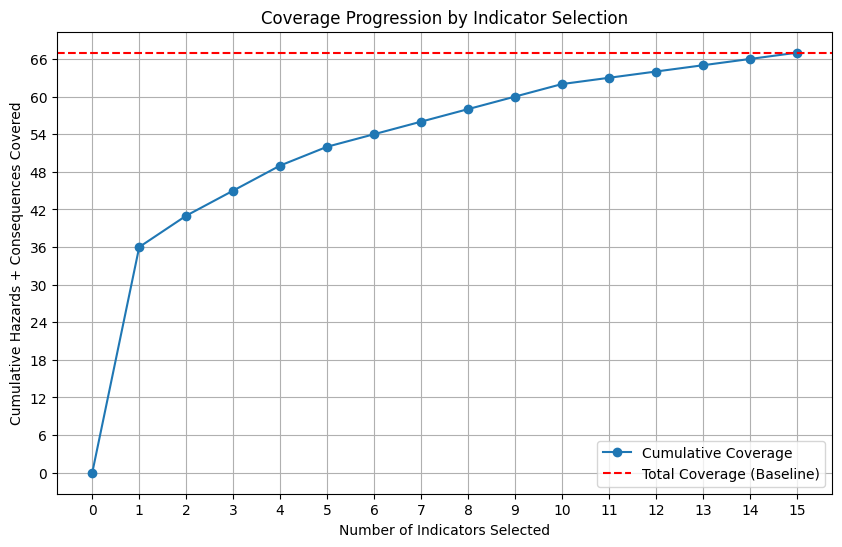

In [23]:
import matplotlib.pyplot as plt

# Initialize variables
selected_indicators = set()
covered = set()
coverage_progress = []  # Track cumulative coverage
indicators_to_consider = list(indicator_coverage_map.keys())  # All indicators

# Iteratively add indicators based on the greedy algorithm
for _ in range(len(indicators_to_consider)):
    # Select the indicator that covers the most uncovered elements
    best_indicator = None
    best_coverage = set()
    for indicator in indicators_to_consider:
        new_coverage = indicator_coverage_map[indicator] - covered
        if len(new_coverage) > len(best_coverage):
            best_coverage = new_coverage
            best_indicator = indicator
    if best_indicator is None:
        break  # No more indicators to add
    
    # Add the selected indicator to the set
    selected_indicators.add(best_indicator)
    covered.update(best_coverage)
    indicators_to_consider.remove(best_indicator)  # Exclude already selected indicators
    
    # Track cumulative coverage
    coverage_progress.append(len(covered))

# Add initial zero point for plot clarity
coverage_progress = [0] + coverage_progress

# Plot Coverage Progression
plt.figure(figsize=(10, 6))
plt.plot(range(len(coverage_progress)), coverage_progress, marker='o', label='Cumulative Coverage')
plt.axhline(y=len(all_coverage), color='r', linestyle='--', label='Total Coverage (Baseline)')
plt.title('Coverage Progression by Indicator Selection')
plt.xlabel('Number of Indicators Selected')
plt.ylabel('Cumulative Hazards + Consequences Covered')
plt.xticks(range(0, len(coverage_progress), max(1, len(coverage_progress) // 10)))
plt.yticks(range(0, len(all_coverage) + 1, max(1, len(all_coverage) // 10)))
plt.legend()
plt.grid()
plt.show()



## 1. Marginal Gain Analysis
- Compute the marginal gain in coverage (additional hazards and consequences covered) for each additional indicator.
- Stop adding indicators when the marginal gain falls below a certain threshold.

In [28]:
gain_threshold=3
# Compute marginal gains
marginal_gains = [coverage_progress[i] - coverage_progress[i - 1] for i in range(1, len(coverage_progress))]
optimal_point = next((i + 1 for i, gain in enumerate(marginal_gains) if gain < gain_threshold), len(coverage_progress) - 1)

print(f"Optimal number of indicators to select: {optimal_point}")

Optimal number of indicators to select: 6


## 2. Cost-Benefit Ratio
- Assign a cost (e.g., resources, time, or complexity) to each indicator.
- Compute the benefit-to-cost ratio for each indicator.
- Stop adding indicators when the ratio falls below a predefined threshold.

In [ ]:
costs = [indicator_cost_map[indicator] for indicator in selected_indicators]
benefits = [coverage_progress[i] for i in range(len(coverage_progress))]
ratios = [benefits[i] / costs[i] for i in range(len(costs))]

optimal_point = next((i + 1 for i, ratio in enumerate(ratios) if ratio < 0.5), len(ratios))
print(f"Optimal number of indicators to select (cost-benefit): {optimal_point}")

Pareto

In [32]:
from kneed import KneeLocator

# Use KneeLocator to find the elbow point
knee_locator = KneeLocator(range(len(coverage_progress)), coverage_progress, curve="concave", direction="increasing")
optimal_point = knee_locator.knee

print(f"Optimal number of indicators to select (knee/elbow point): {optimal_point}")

Optimal number of indicators to select (knee/elbow point): 2


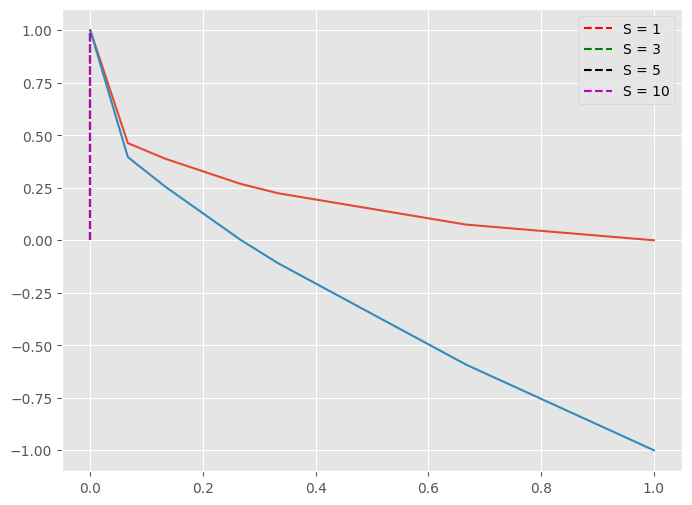

In [48]:
import numpy as np

np.random.seed(23)

sensitivity = [1, 3, 5, 10]
knees = []
norm_knees = []

y = coverage_progress
n = len(y)
x = range(1, n + 1)

for s in sensitivity:
    kl = KneeLocator(x, y, curve="convex", direction="decreasing", S=s)
    knees.append(kl.knee)
    norm_knees.append(kl.norm_knee)


import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(kl.x_normalized, kl.y_normalized)
plt.plot(kl.x_difference, kl.y_difference)
colors = ["r", "g", "k", "m", "c", "orange"]
for k, c, s in zip(norm_knees, colors, sensitivity):
    plt.vlines(k, 0, 1, linestyles="--", colors=c, label=f"S = {s}")
plt.legend()

In [45]:
y

[0, 36, 41, 45, 49, 52, 54, 56, 58, 60, 62, 63, 64, 65, 66, 67]

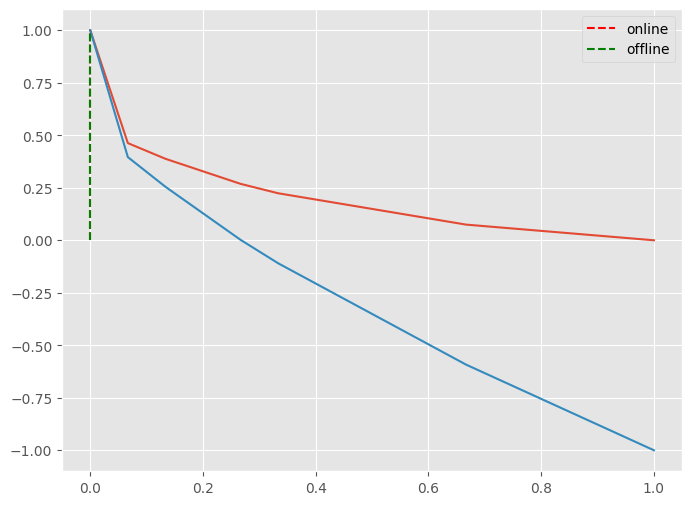

In [49]:
kl_online = KneeLocator(x, y, curve="convex", direction="decreasing", online=True)
kl_offline = KneeLocator(x, y, curve="convex", direction="decreasing", online=False)

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(kl_online.x_normalized, kl_online.y_normalized)
plt.plot(kl_online.x_difference, kl_online.y_difference)
colors = ["r", "g"]
for k, c, o in zip(
    [kl_online.norm_knee, kl_offline.norm_knee], ["r", "g"], ["online", "offline"]
):
    plt.vlines(k, 0, 1, linestyles="--", colors=c, label=o)
plt.legend()

In [47]:
len(indicators_to_consider

39

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


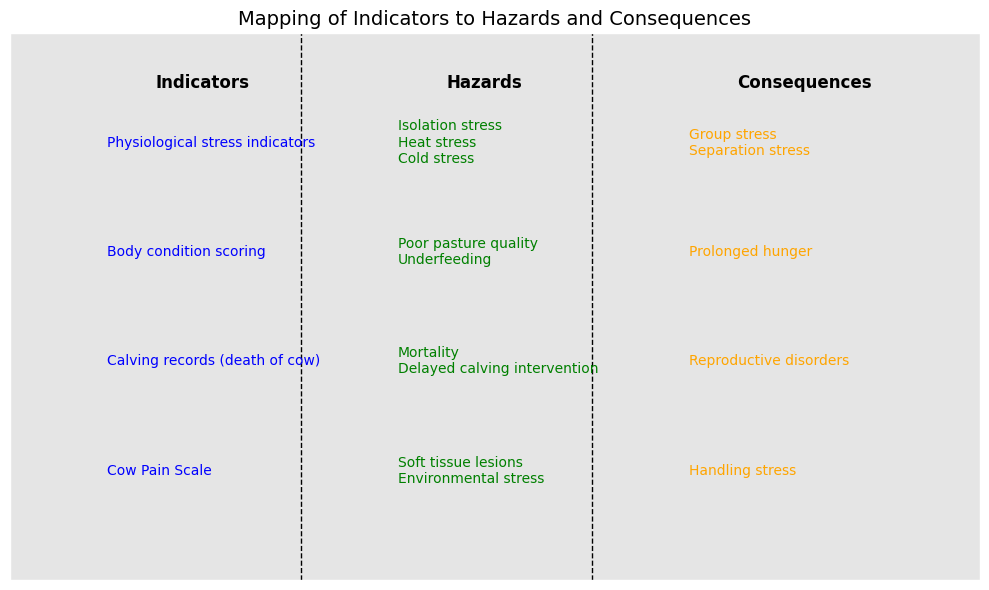

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
selected_indicators = [
    "Physiological stress indicators",
    "Body condition scoring",
    "Calving records (death of cow)",
    "Cow Pain Scale",
]
indicator_hazard_map = {
    "Physiological stress indicators": {"Cold stress", "Heat stress", "Isolation stress"},
    "Body condition scoring": {"Underfeeding", "Poor pasture quality"},
    "Calving records (death of cow)": {"Delayed calving intervention", "Mortality"},
    "Cow Pain Scale": {"Soft tissue lesions", "Environmental stress"},
}
indicator_consequence_map = {
    "Physiological stress indicators": {"Separation stress", "Group stress"},
    "Body condition scoring": {"Prolonged hunger"},
    "Calving records (death of cow)": {"Reproductive disorders"},
    "Cow Pain Scale": {"Handling stress"},
}

# Prepare data for plotting
indicators = []
hazards = []
consequences = []
for indicator in selected_indicators:
    indicators.append(indicator)
    hazards.append("\n".join(indicator_hazard_map.get(indicator, [])))
    consequences.append("\n".join(indicator_consequence_map.get(indicator, [])))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add text for indicators, hazards, and consequences
for i, (indicator, hazard, consequence) in enumerate(zip(indicators, hazards, consequences)):
    ax.text(0.1, len(indicators) - i, indicator, fontsize=10, verticalalignment="center", color="blue")
    ax.text(0.4, len(indicators) - i, hazard, fontsize=10, verticalalignment="center", color="green")
    ax.text(0.7, len(indicators) - i, consequence, fontsize=10, verticalalignment="center", color="orange")

# Customize plot appearance
ax.set_xlim(0, 1)
ax.set_ylim(0, len(indicators) + 1)
ax.set_xticks([])
ax.set_yticks([])
ax.axvline(0.3, color="black", linestyle="--", linewidth=1)
ax.axvline(0.6, color="black", linestyle="--", linewidth=1)
ax.set_title("Mapping of Indicators to Hazards and Consequences", fontsize=14)

# Add labels
plt.text(0.15, len(indicators) + 0.5, "Indicators", fontsize=12, weight="bold")
plt.text(0.45, len(indicators) + 0.5, "Hazards", fontsize=12, weight="bold")
plt.text(0.75, len(indicators) + 0.5, "Consequences", fontsize=12, weight="bold")

# Show the plot
plt.tight_layout()
plt.show()

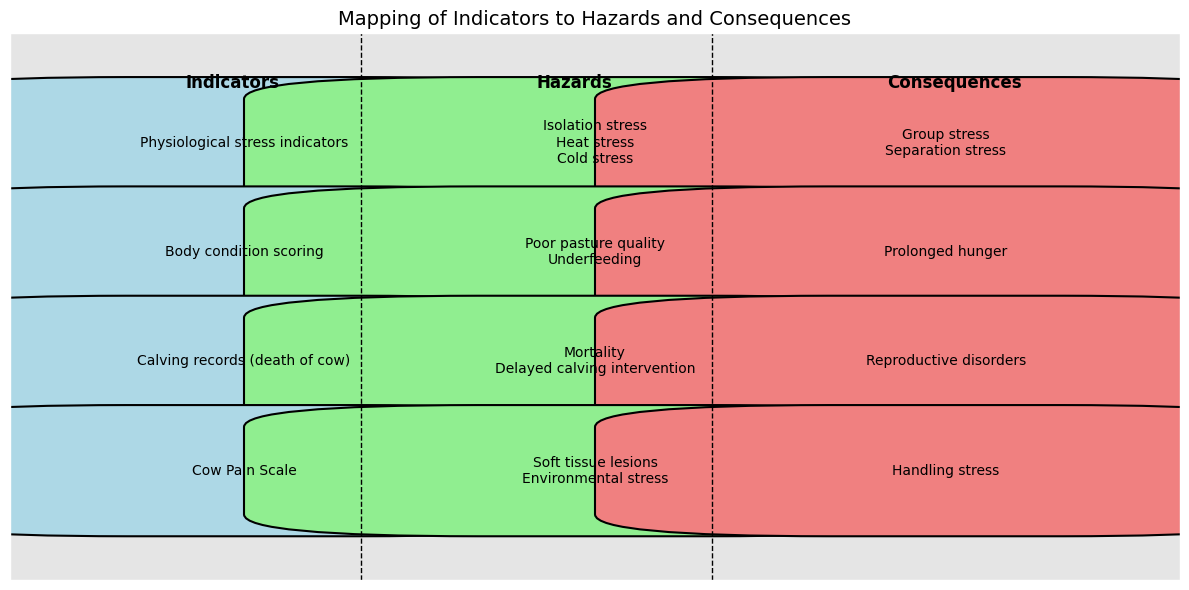

In [51]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Example data
selected_indicators = [
    "Physiological stress indicators",
    "Body condition scoring",
    "Calving records (death of cow)",
    "Cow Pain Scale",
]
indicator_hazard_map = {
    "Physiological stress indicators": {"Cold stress", "Heat stress", "Isolation stress"},
    "Body condition scoring": {"Underfeeding", "Poor pasture quality"},
    "Calving records (death of cow)": {"Delayed calving intervention", "Mortality"},
    "Cow Pain Scale": {"Soft tissue lesions", "Environmental stress"},
}
indicator_consequence_map = {
    "Physiological stress indicators": {"Separation stress", "Group stress"},
    "Body condition scoring": {"Prolonged hunger"},
    "Calving records (death of cow)": {"Reproductive disorders"},
    "Cow Pain Scale": {"Handling stress"},
}

# Prepare data for plotting
indicators = []
hazards = []
consequences = []
for indicator in selected_indicators:
    indicators.append(indicator)
    hazards.append("\n".join(indicator_hazard_map.get(indicator, [])))
    consequences.append("\n".join(indicator_consequence_map.get(indicator, [])))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Box styling helper function
def add_text_box(ax, x, y, text, box_color):
    ax.add_patch(
        FancyBboxPatch(
            (x, y - 0.4),  # Position
            width=0.2,
            height=0.8,
            boxstyle="round,pad=0.2",
            edgecolor="black",
            facecolor=box_color,
            linewidth=1.5,
        )
    )
    ax.text(
        x + 0.1,
        y,
        text,
        fontsize=10,
        verticalalignment="center",
        horizontalalignment="center",
        color="black",
    )

# Add boxes and text
y_positions = range(len(indicators), 0, -1)
for i, (indicator, hazard, consequence) in enumerate(zip(indicators, hazards, consequences)):
    y = y_positions[i]
    add_text_box(ax, 0.1, y, indicator, "lightblue")       # Indicator box
    add_text_box(ax, 0.4, y, hazard, "lightgreen")         # Hazard box
    add_text_box(ax, 0.7, y, consequence, "lightcoral")    # Consequence box

# Customize plot appearance
ax.set_xlim(0, 1)
ax.set_ylim(0, len(indicators) + 1)
ax.set_xticks([])
ax.set_yticks([])
ax.axvline(0.3, color="black", linestyle="--", linewidth=1)
ax.axvline(0.6, color="black", linestyle="--", linewidth=1)
ax.set_title("Mapping of Indicators to Hazards and Consequences", fontsize=14)

# Add column labels
plt.text(0.15, len(indicators) + 0.5, "Indicators", fontsize=12, weight="bold")
plt.text(0.45, len(indicators) + 0.5, "Hazards", fontsize=12, weight="bold")
plt.text(0.75, len(indicators) + 0.5, "Consequences", fontsize=12, weight="bold")

# Show the plot
plt.tight_layout()
plt.show()
